<!-- # Regresión Lineal Univariada -->

In [ ]:
# Descomentar para instalar libreria.

# !pip install statsmodels

# Regresión Lineal Univariada - Usando 'OverallQual' para predecir 'SalePrice'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [11]:

# Cargar el dataset
df = pd.read_csv("train.csv")  # Asegúrate de que el archivo está en la misma carpeta del notebook

# Eliminar columnas con un alto número de valores nulos (>40%)
missing_percentage = df.isnull().sum() / len(df)
columns_to_drop = missing_percentage[missing_percentage > 0.4].index.tolist()
df = df.drop(columns=columns_to_drop)

# Imputación de valores nulos para columnas restantes (rellenar con la mediana para valores numéricos)
df = df.fillna(df.median(numeric_only=True))

# Ver las primeras filas para verificar que la carga fue correcta
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
# Seleccionar la variable predictora
X = df[['OverallQual']]
y = df['SalePrice']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("----------------- X train ----------------- \n", X_train)
print("----------------- X test ----------------- \n", X_test)
print("----------------- Y train ----------------- \n", y_train)
print("----------------- Y test ----------------- \n", y_test)

----------------- X train ----------------- 
       OverallQual
254             5
1066            6
638             5
799             5
380             5
...           ...
1095            6
1130            4
1294            5
860             7
1126            7

[1168 rows x 1 columns]
----------------- X test ----------------- 
       OverallQual
892             6
1105            8
413             5
522             6
1036            9
...           ...
479             4
1361            7
802             7
651             4
722             4

[292 rows x 1 columns]
----------------- Y train ----------------- 
 254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64
----------------- Y test ----------------- 
 892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     

In [14]:
# Ajustar el modelo
lin_reg_uni = LinearRegression()
lin_reg_uni.fit(X_train, y_train)

# Predicciones
y_train_pred = lin_reg_uni.predict(X_train)
y_test_pred = lin_reg_uni.predict(X_test)


In [15]:

# Evaluación del modelo
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Imprimir métricas
print(f"RMSE (train): {train_rmse}")
print(f"RMSE (test): {test_rmse}")
print(f"R² (train): {train_r2}")
print(f"R² (test): {test_r2}")


RMSE (train): 47789.62867359155
RMSE (test): 51778.62651238531
R² (train): 0.6170962665508342
R² (test): 0.6504677778896863


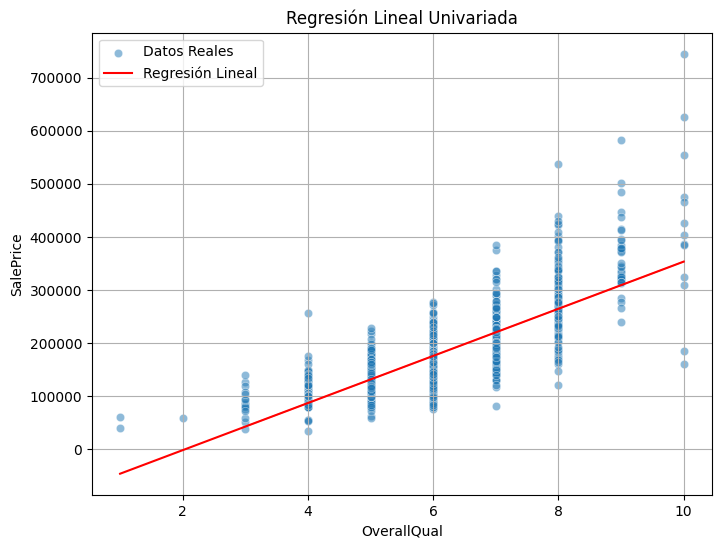

In [16]:

# Gráfico de regresión
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train['OverallQual'], y=y_train, alpha=0.5, label="Datos Reales")
sns.lineplot(x=X_train['OverallQual'], y=y_train_pred, color='red', label="Regresión Lineal")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Regresión Lineal Univariada")
plt.legend()
plt.grid(True)
plt.show()

# Regresión Lineal Múltiple

In [26]:
# Filtrar solo columnas numéricas
num_features = df.select_dtypes(include=['number']).columns.tolist()
num_features.remove('SalePrice')  # Remover la variable objetivo

# Crear X y y
X = df[num_features]
y = df['SalePrice']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("----------------- X train ----------------- \n", X_train)
print("----------------- X test ----------------- \n", X_test)
print("----------------- Y train ----------------- \n", y_train)
print("----------------- Y test ----------------- \n", y_test)




----------------- X train ----------------- 
         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
254    255          20         70.0     8400            5            6   
1066  1067          60         59.0     7837            6            7   
638    639          30         67.0     8777            5            7   
799    800          50         60.0     7200            5            7   
380    381          50         50.0     5000            5            6   
...    ...         ...          ...      ...          ...          ...   
1095  1096          20         78.0     9317            6            5   
1130  1131          50         65.0     7804            4            3   
1294  1295          20         60.0     8172            5            7   
860    861          50         55.0     7642            7            8   
1126  1127         120         53.0     3684            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  Garag

In [27]:

# Ajustar el modelo
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)

# Predicciones
y_train_pred = lin_reg_multi.predict(X_train)
y_test_pred = lin_reg_multi.predict(X_test)

print("Prediccion train Y ", y_train_pred)
print("Prediccion test X ", y_test_pred)




Prediccion train Y  [139338.83124362 185761.39380876  81092.96469204 ... 134485.05808693
 161019.63750969 219685.5821474 ]
Prediccion test X  [153728.35587821 309240.63643864 112897.28767429 180476.6499438
 294934.41483636  50896.24388758 233798.03526386 147918.89233612
  48537.33135142 149769.91270308 153067.34685241 113763.96814436
  75297.22434496 212612.71656534 187784.20530428 141170.96050726
 213143.32806252 137019.98969389 114717.50305872 235256.97198849
 182192.56286471 210961.71284859 190380.95295816 129928.97688461
 211510.888759   151157.95399067 198307.60861284  77888.83211998
 178965.6945849  182617.89478754 118418.76940606 271915.99287149
 225414.05307324  88963.40404419 266107.02349107 159799.56316621
 148310.61583496 217693.13100349 304138.20273584  88049.98182409
 136864.07434221 249732.56596939 105380.47491451 275227.2649405
 128603.48914683 126457.98987211 103127.92564237 131515.51324365
 360529.9059553  128109.50505494 106968.22343025 214783.36796908
  89294.7447912

In [28]:
# Evaluación del modelo
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Imprimir métricas
print(f"RMSE (train): {train_rmse}")
print(f"RMSE (test): {test_rmse}")
print(f"R² (train): {train_r2}")
print(f"R² (test): {test_r2}")



RMSE (train): 33907.32519094976
RMSE (test): 36879.81932192816
R² (train): 0.8072433581072286
R² (test): 0.8226775450640382


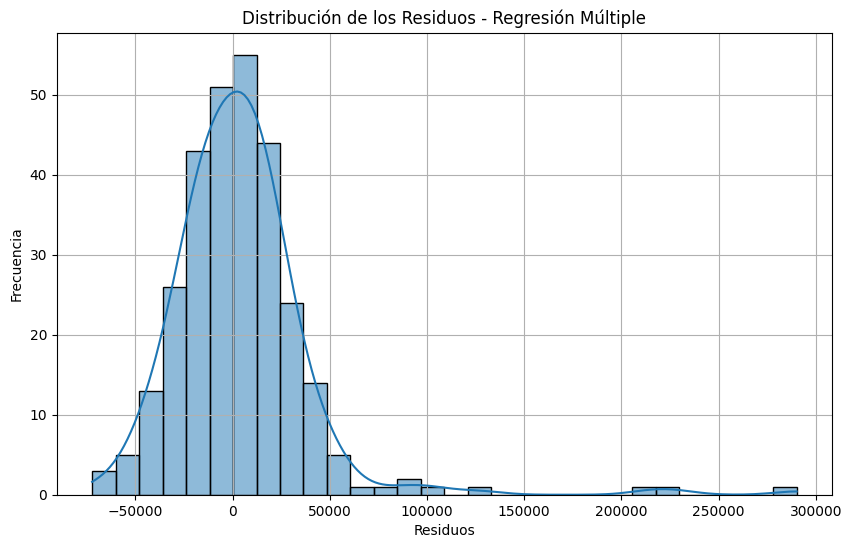

In [29]:
# Histograma de los residuos
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos - Regresión Múltiple")
plt.grid(True)
plt.show()


# Análisis de Multicolinealidad - Cálculo del VIF



In [31]:
# Agregar constante para el modelo
X_with_const = sm.add_constant(X_train)

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Mostrar las variables con alta multicolinealidad
print(vif_data[vif_data["VIF"] > 5])



        Variable           VIF
0          const  2.447557e+06
7      YearBuilt  5.076435e+00
10    BsmtFinSF1           inf
11    BsmtFinSF2           inf
12     BsmtUnfSF           inf
13   TotalBsmtSF           inf
14      1stFlrSF           inf
15      2ndFlrSF           inf
16  LowQualFinSF           inf
17     GrLivArea           inf
24  TotRmsAbvGrd  5.006151e+00
27    GarageCars  5.586022e+00
28    GarageArea  5.523049e+00


C:\Users\pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
